In [10]:
# Passo 1 - Criando dados para manusearmos
#T1a
import pandas as pd
# Criando o DataFrame
dados = {
 'Vendedores': [
  "Alan", "Bianca", "Caio", "Daniela", "Eduardo", "Fernanda", "Guilherme", "Helena", "Igor", "Juliana",
  "Kleber", "Larissa", "Marcelo", "Nicole", "Otávia", "Paulo", "Renata", "Samuel", "Taina", "Vinicius"
 ],

 'Região': ['Norte']*3 +  ['Sul']*3 +  ['Leste']*7 + ['Oeste']*7,

 'Clientes Contatados': [
  29, 34, 37, 27, 31, 28, 40, 35, 26, 32,
  39, 23, 38, 30, 42, 25, 33, 36, 41, 28

 ],

 'Unidades_Vendidas': [
  11, 15, 18, 12, 13, 10, 20, 16, 10, 14,
  19, 9, 17, 12, 21, 11, 14, 16, 22, 12
  ],

 'Nota_Atendimento': [
  7.9, 8.2, 8.7, 6.5, 7.6, 7.3, 9.0, 7.1, 8.1, 7.8,
  8.9, 6.2, 8.5, 7.5, 9.3, 6.8, 8.3, 8.0, 9.1, 6.6

 ]

}
# Criar DataFrame
df = pd.DataFrame(dados)
# Exibir a tabela
print(df)


   Vendedores Região  Clientes Contatados  Unidades_Vendidas  Nota_Atendimento
0        Alan  Norte                   29                 11               7.9
1      Bianca  Norte                   34                 15               8.2
2        Caio  Norte                   37                 18               8.7
3     Daniela    Sul                   27                 12               6.5
4     Eduardo    Sul                   31                 13               7.6
5    Fernanda    Sul                   28                 10               7.3
6   Guilherme  Leste                   40                 20               9.0
7      Helena  Leste                   35                 16               7.1
8        Igor  Leste                   26                 10               8.1
9     Juliana  Leste                   32                 14               7.8
10     Kleber  Leste                   39                 19               8.9
11    Larissa  Leste                   23           

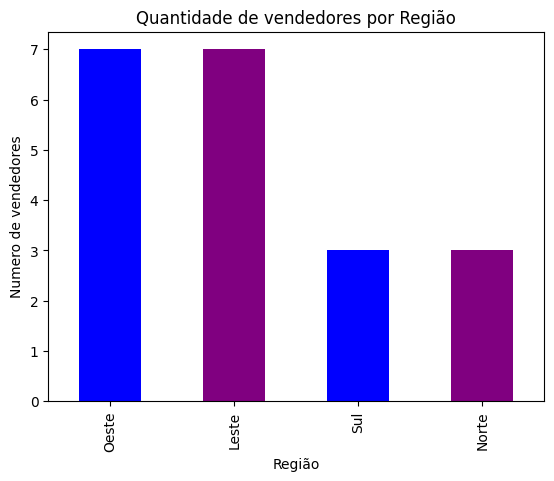

In [19]:
# Exercio 01

import matplotlib.pyplot as plt

# Contar quantos de cada gênero
contagem_vendedor = df['Região'].value_counts()

# Plotar
contagem_vendedor.plot(kind='bar', color=['blue', 'purple'])
plt.title('Quantidade de vendedores por Região')
plt.xlabel('Região')
plt.ylabel('Numero de vendedores')
plt.show()


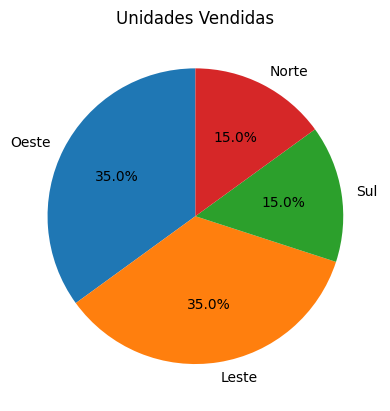

In [16]:
# Exercicio 02

# Frequência relativa
frequencia_regiao = df['Região'].value_counts(normalize=True)

# Gráfico de pizza
frequencia_regiao.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Unidades Vendidas')
plt.ylabel('')
plt.show()


In [23]:
# Exercicio 03

total = len(df)
# Filtrar vendedores que venderam mais de 15 unidades
vendedores_mais_15 = df[df["Unidades Vendidas"] > 15].shape[0]
# Calcular a probabilidade
probabilidade = vendedores_mais_15 / total
# Exibir resultado
print(f"Vendedores com mais de 15 unidades vendidas: {vendedores_mais_15}")
print(f"Total de vendedores: {total}")
print(f"Probabilidade: {probabilidade:.2f}")


Vendedores com mais de 15 unidades vendidas: 8
Total de vendedores: 20
Probabilidade: 0.40


In [46]:
# Exercicio 04

import pandas as pd
notas= [
  7.9, 8.2, 8.7, 6.5, 7.6, 7.3, 9.0, 7.1, 8.1, 7.8,
  8.9, 6.2, 8.5, 7.5, 9.3, 6.8, 8.3, 8.0, 9.1, 6.6
 ]

df = pd.DataFrame({"Nota Atendimento": notas})


total = len(df)

# Vendedores com nota acima de 7,5
acima_75 = df[df["Nota Atendimento"] > 7.5].shape[0]

# Calcular a probabilidade
probabilidade = acima_75 / total

# Exibir resultado
print(f"Vendedores com nota > 7,5: {acima_75}")
print(f"Total de vendedores: {total}")
print(f"Probabilidade: {probabilidade:.2f}")

Vendedores com nota > 7,5: 13
Total de vendedores: 20
Probabilidade: 0.65


Equação da regressão: y = -7.22 + 0.67x


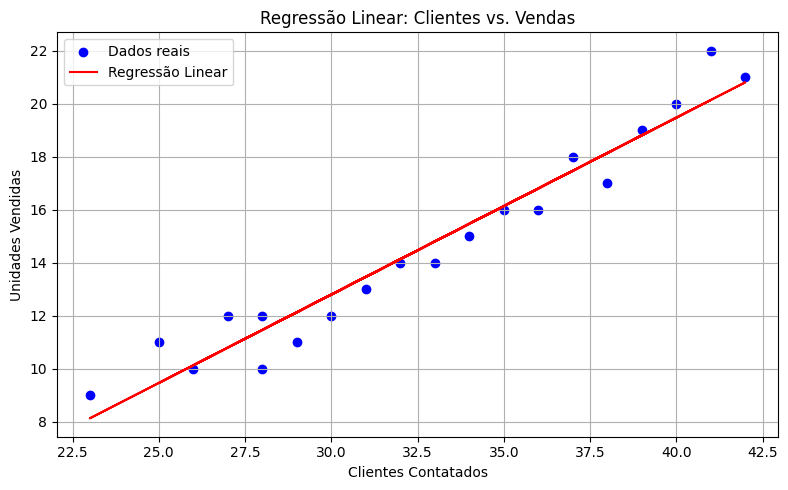

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Re-create the original DataFrame to include the necessary columns
dados = {
    'Vendedores': [
        "Alan", "Bianca", "Caio", "Daniela", "Eduardo", "Fernanda", "Guilherme", "Helena", "Igor", "Juliana",
        "Kleber", "Larissa", "Marcelo", "Nicole", "Otávia", "Paulo", "Renata", "Samuel", "Taina", "Vinicius"
    ],
    'Região': ['Norte'] * 3 + ['Sul'] * 3 + ['Leste'] * 7 + ['Oeste'] * 7,
    'Clientes Contatados': [
        29, 34, 37, 27, 31, 28, 40, 35, 26, 32,
        39, 23, 38, 30, 42, 25, 33, 36, 41, 28
    ],
    'Unidades_Vendidas': [
        11, 15, 18, 12, 13, 10, 20, 16, 10, 14,
        19, 9, 17, 12, 21, 11, 14, 16, 22, 12
    ],
    'Nota_Atendimento': [
        7.9, 8.2, 8.7, 6.5, 7.6, 7.3, 9.0, 7.1, 8.1, 7.8,
        8.9, 6.2, 8.5, 7.5, 9.3, 6.8, 8.3, 8.0, 9.1, 6.6
    ]
}
df_original = pd.DataFrame(dados)  # Create a new DataFrame to avoid overwriting

# X = variável independente (clientes contatados), reshape para formato de array 2D
X = df_original[['Clientes Contatados']].values  # Use the original DataFrame
# y = variável dependente (unidades vendidas)
y = df_original['Unidades_Vendidas'].values  # Use the original DataFrame
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)
# Obter coeficientes
b0 = modelo.intercept_
b1 = modelo.coef_[0]
print(f"Equação da regressão: y = {b0:.2f} + {b1:.2f}x")
# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, modelo.predict(X), color='red', label='Regressão Linear')
plt.xlabel("Clientes Contatados")
plt.ylabel("Unidades Vendidas")
plt.title("Regressão Linear: Clientes vs. Vendas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estimativa de vendas para 45 clientes contatados: 22.81 unidades


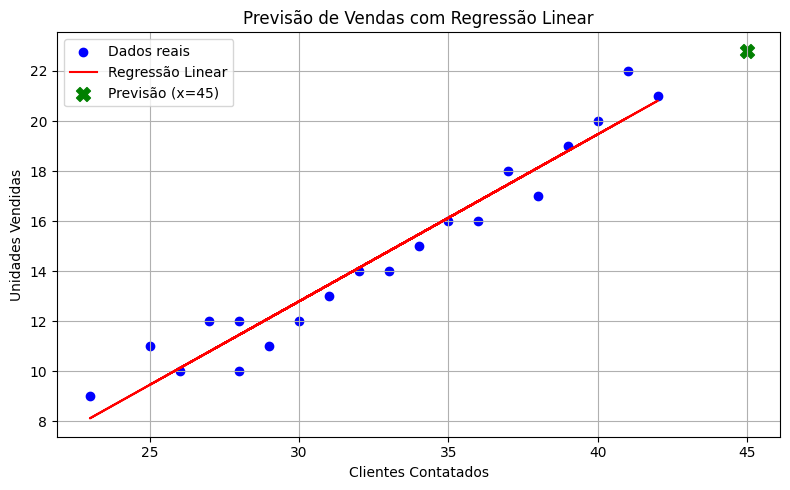

In [56]:
# Previsão para 45 clientes
x_novo = np.array([[45]])
y_previsto = modelo.predict(x_novo)[0]
print(f"Estimativa de vendas para 45 clientes contatados: {y_previsto:.2f} unidades")
# Gráfico com ponto de previsão destacado
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, modelo.predict(X), color='red', label='Regressão Linear')
plt.scatter(45, y_previsto, color='green', s=100, label='Previsão (x=45)', marker='X')
plt.xlabel("Clientes Contatados")
plt.ylabel("Unidades Vendidas")
plt.title("Previsão de Vendas com Regressão Linear")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

